# AI Handwritting Recognition ver 1

## Import libary

In [25]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot as plt
import imageio.v3
# glob helps select multiple files using patterns
import glob

## Neural Network from scratch

In [26]:
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [27]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 700
output_nodes = 10

# learning rate
learning_rate = 0.155

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

## Load model ANN

In [28]:
# Hàm tải mô hình
def load_model(filename, input_nodes, hidden_nodes, output_nodes, learning_rate):
    # Tải trọng số từ file
    wih = numpy.load(filename + '_wih.npy')
    who = numpy.load(filename + '_who.npy')
    
    # Tạo một mô hình mới với các trọng số đã tải
    network = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
    network.wih = wih
    network.who = who
    print(f"Model loaded from {filename}.")
    
    return network

# Tải mô hình đã lưu
n_loaded = load_model('my_model', input_nodes, hidden_nodes, output_nodes, learning_rate)

Model loaded from my_model.


## Checking performance


In [29]:
# load the mnist test data CSV file into a list
test_data_file1 = open("mnist_dataset/mnist_test.csv", 'r')
test_data_file2 = open("mnist_dataset/mnist_test_10.csv", 'r')

# read all lines into a list
test_data_list1 = test_data_file1.readlines()
test_data_list2 = test_data_file2.readlines()

# close the files
test_data_file1.close()
test_data_file2.close()

# concatenate the two lists
test_data_list = test_data_list1 + test_data_list2


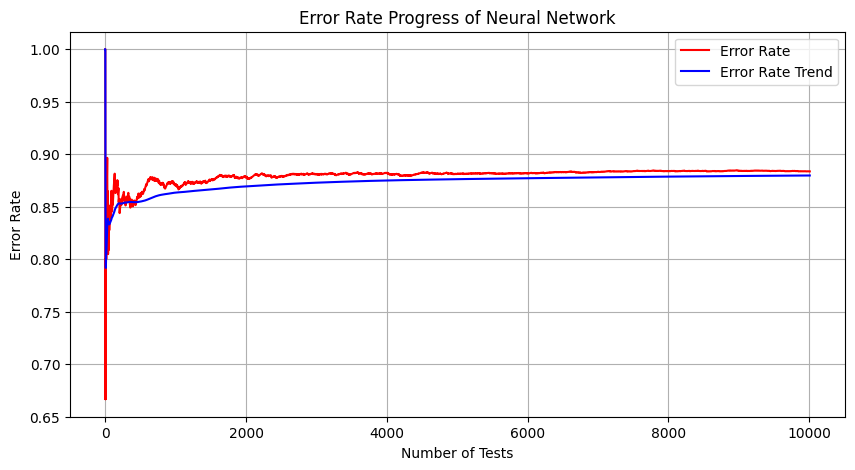

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# scorecard for how well the network performs, initially empty
scorecard = []

# list to store error rate after each test
error_progress = []
window_size = 10  # Kích thước cửa sổ trung bình động
error_trend = []

# go through all the records in the test data set
for i, record in enumerate(test_data_list):
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (np.asarray(all_values[1:], dtype=float) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = np.argmax(outputs)
    # append correct or incorrect to list
    scorecard.append(1 if label == correct_label else 0)
    
    # calculate error rate after each test and store it
    error_rate = 1 - sum(scorecard) / len(scorecard)  # in percentage
    error_progress.append(error_rate)
    
    # Calculate cumulative moving average (trend line)
    trend_value = np.mean(error_progress)
    error_trend.append(trend_value)

# plot the error rate progress
plt.figure(figsize=(10, 5))
plt.plot(error_progress, color='red', label='Error Rate')
plt.plot(error_trend, color='blue', label='Error Rate Trend')
plt.xlabel("Number of Tests")
plt.ylabel("Error Rate")
plt.title("Error Rate Progress of Neural Network")
plt.legend()
plt.grid(True)
plt.show()


In [31]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.11638361638361638


## Handwritting input

In [32]:
from PIL import Image

import matplotlib.pyplot as plt
our_own_dataset = []

# load the png image data as test data set
for image_file_name in glob.glob('t3.png'):
    
    # load image data and resize to 28x28 using PIL
    print("loading ...", image_file_name)
    img = Image.open(image_file_name).convert('L')  # convert to grayscale
    img_resized = img.resize((28, 28))  # resize to 28x28
    
    # convert image to numpy array
    img_array = numpy.array(img_resized).astype(float)
    
    # reshape from 28x28 to list of 784 values, invert values
    img_data = 255.0 - img_array.reshape(784)
    
    # then scale data to range from 0.01 to 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    
    # append label and image data to test data set
    our_own_dataset.append(img_data)

print("Dataset loaded with", len(our_own_dataset), "images")


loading ... t3.png
0.01
1.0
Dataset loaded with 1 images


## Ouput

[[0.02183452]
 [0.00291289]
 [0.26640057]
 [0.00315948]
 [0.03229087]
 [0.0025998 ]
 [0.00298135]
 [0.0199675 ]
 [0.01659818]
 [0.77027952]]
Predicted label:  9
Confidence: 77.03%


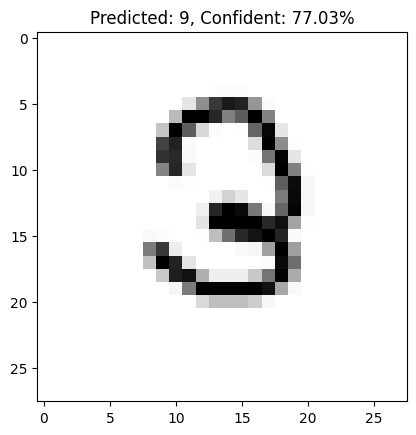

In [33]:
# test the neural network with our own images

# record to test
item = 0

# plot image
plt.imshow(our_own_dataset[item].reshape(28, 28), cmap='Greys', interpolation='None')

# correct answer is first value
correct_label = our_own_dataset[item][0]
# data is remaining values
inputs = our_own_dataset[item]

# query the network
outputs = n_loaded.query(inputs)
print (outputs)

# the index of the highest value corresponds to the label
label = numpy.argmax(outputs)
print("Predicted label: ", label)

confidence = outputs[label].item() * 100
print(f"Confidence: {confidence:.2f}%")

plt.title(f"Predicted: {label}, Confident: {confidence:.2f}%")
plt.show()
user_check = input("Is right? (y/n): ").strip().lower()


Loading ... test.png


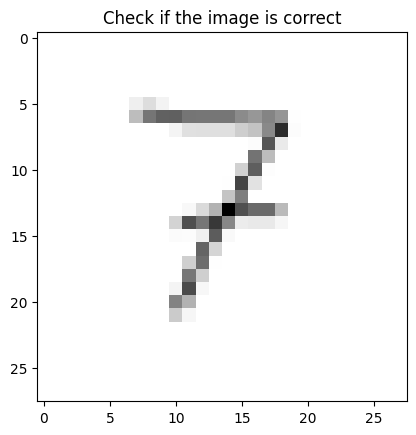

In [34]:
import csv
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

if user_check == 'n':
    # Đường dẫn file CSV để lưu dữ liệu ảnh sai
    incorrect_data_file = 'mnist_dataset/incorrect_images.csv'
    # Đường dẫn ảnh cần xử lý
    image_file_name = 'test.png'  # Thay đổi tên file ảnh tại đây

    # Mở file CSV để ghi dữ liệu ảnh sai
    with open(incorrect_data_file, 'a', newline='') as outfile:
        writer = csv.writer(outfile)

        print("Loading ...", image_file_name)
        # Mở và resize ảnh về 28x28
        img = Image.open(image_file_name).convert('L')
        img_resized = img.resize((28, 28))
        
        # Chuyển ảnh thành mảng numpy 1D
        img_array = np.array(img_resized).reshape(784).astype(float)
        
        # Invert giá trị ảnh và scale về khoảng [0.01, 1.0]
        img_data = 255.0 - img_array  # Invert giá trị (trắng -> đen, đen -> trắng)
        img_data = (img_data / 255.0 * 0.99) + 0.01  # Scale về [0.01, 1.0]
        
        # In ra ảnh trước khi hỏi người dùng
        plt.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
        plt.title("Check if the image is correct")
        plt.show()

        # Hỏi người dùng xem ảnh có đúng không
        user_input = input("Is it right? (y/n): ").strip().lower()
        
        if user_input == 'y':
            # Yêu cầu người dùng nhập nhãn
            label = input("Please enter the correct label for this image: ").strip()
            # Kiểm tra nhãn có phải là số hay không
            while not label.isdigit():
                print("Invalid label. Please enter a number.")
                label = input("Please enter the correct label for this image: ").strip()
            
            # Chuyển nhãn thành số nguyên
            label = int(label)
            
            # Lưu nhãn và dữ liệu ảnh vào file CSV
            writer.writerow([label] + img_data.tolist())
